<h1>Chapter 2 | Case Study C1 | <b>Identifying Successful Football Managers</b></h1>
<p>In this notebook, I'll be writing the code for the aforementionred case study of the book. The main goal is to observe and learn how to structure the data according to our neeeds, which means applying the concept of <i>tidy data</i> aas well as merging different datasets to get the desired outcome.</p>
<p>Here, our question is: <i>who are the most successful football managers in England?</p>


In [2]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

In [47]:
# Current script folder path
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# Location folders
data_in = f"{dirname}da_data_repo/football/clean/"
data_out = f"{dirname}ch02-football_manager_successs/"
output = f"{dirname}ch02-football_manager_successs/output"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [48]:
from py_helper_functions import seq, color

<p>Ok, let's load the dataset containing data on 11 seasons of EPL games (2008/2009 - 2018/2019). Following, I will sort the values according to the <code>Team Home</code> variable, ascending.</p>

In [49]:
epl_games = pd.read_csv(f"{data_in}epl_games.csv")

In [50]:
epl_games.sort_values(["team_home"])

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
3638,E0,2017,03jan2018,Arsenal,Chelsea,1,1,2,2
1900,E0,2013,17aug2013,Arsenal,Aston Villa,0,3,1,3
1014,E0,2010,12feb2011,Arsenal,Wolves,3,0,2,0
3939,E0,2018,02dec2018,Arsenal,Tottenham,3,0,4,2
...,...,...,...,...,...,...,...,...,...
1004,E0,2010,05feb2011,Wolves,Man United,3,0,2,1
489,E0,2009,07nov2009,Wolves,Arsenal,0,3,1,4
3928,E0,2018,25nov2018,Wolves,Huddersfield,0,3,0,2
553,E0,2009,20dec2009,Wolves,Burnley,3,0,2,0


<p>Note, however, that all games are not sorted by season. Let's sort the dataset once more, now, considering also the variable <code>season</code>.

In [51]:
epl_games.sort_values(["season", "team_home"])

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
0,E0,2008,16aug2008,Arsenal,West Brom,3,0,1,0
21,E0,2008,30aug2008,Arsenal,Newcastle,3,0,3,0
53,E0,2008,27sep2008,Arsenal,Hull,0,3,1,2
75,E0,2008,18oct2008,Arsenal,Everton,3,0,3,1
95,E0,2008,29oct2008,Arsenal,Tottenham,1,1,4,4
...,...,...,...,...,...,...,...,...,...
4085,E0,2018,02mar2019,Wolves,Cardiff,3,0,2,0
4115,E0,2018,02apr2019,Wolves,Man United,3,0,2,1
4139,E0,2018,20apr2019,Wolves,Brighton,1,1,0,0
4148,E0,2018,24apr2019,Wolves,Arsenal,3,0,3,1


<p>We can filter the dataset and get one particular season. Let's choose the year of <code>2018</code>.</p>

In [52]:
epl_games.loc[lambda x: x["season"] == 2018]

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away
3800,E0,2018,10aug2018,Man United,Leicester,3,0,2,1
3801,E0,2018,11aug2018,Wolves,Everton,1,1,2,2
3802,E0,2018,11aug2018,Huddersfield,Chelsea,0,3,0,3
3803,E0,2018,11aug2018,Fulham,Crystal Palace,0,3,0,2
3804,E0,2018,11aug2018,Newcastle,Tottenham,0,3,1,2
...,...,...,...,...,...,...,...,...,...
4175,E0,2018,12may2019,Burnley,Arsenal,0,3,1,3
4176,E0,2018,12may2019,Tottenham,Everton,1,1,2,2
4177,E0,2018,12may2019,Liverpool,Wolves,3,0,2,0
4178,E0,2018,12may2019,Southampton,Huddersfield,1,1,1,1


<p>We can now make some observations about this dataset:</p>
<ul>
    <li>Each observation is a single game</li>
    <li>Key variables: <b>date</b>, <b>name of the home team</b>, <b>name of the away team</b>, <b>points home and away</b>, <b>goals home</b>, <b>goals away</b></li>
    <li>Because each observation is a game, and each game is a separate row in the data table, we can affirm this is a <b>tidy data table</b></li>
    <li>There are 3 ID variables: date, home team, and away team</li>
</ul>
<p>We can analyse the data by structuring differently. If each row is a game played by a team, we will make the data table longer yet it will help us to get the answer to our question. Following, we will sort values according to previous variables and filter the data to get only the <code>2018</code> season.</p>

In [53]:
epl_teams_games = pd.read_csv(f"{data_in}epl-teams-games.csv")

In [54]:
epl_teams_games.sort_values(["team"])

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
0,E0,2008,16aug2008,Arsenal,1,1,3,1,West Brom,0,0,1,33
286,E0,2015,13jan2016,Arsenal,21,0,1,3,Liverpool,1,3,18,1
285,E0,2015,02jan2016,Arsenal,20,1,3,1,Newcastle,0,0,1,22
283,E0,2015,26dec2015,Arsenal,18,0,0,0,Southampton,3,4,27,1
282,E0,2015,21dec2015,Arsenal,17,1,3,2,Man City,0,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8259,E0,2010,20nov2010,Wolves,14,0,0,1,Blackpool,3,2,5,36
8260,E0,2010,27nov2010,Wolves,15,1,3,3,Sunderland,0,2,36,29
8261,E0,2010,04dec2010,Wolves,16,0,0,0,Blackburn,3,3,4,36
8254,E0,2010,23oct2010,Wolves,9,0,0,0,Chelsea,3,2,11,36


In [55]:
epl_teams_games.sort_values(["season", "team"])

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
0,E0,2008,16aug2008,Arsenal,1,1,3,1,West Brom,0,0,1,33
1,E0,2008,23aug2008,Arsenal,2,0,0,0,Fulham,3,1,14,1
2,E0,2008,30aug2008,Arsenal,3,1,3,3,Newcastle,0,0,1,22
3,E0,2008,13sep2008,Arsenal,4,0,3,4,Blackburn,0,0,4,1
4,E0,2008,20sep2008,Arsenal,5,0,3,3,Bolton,0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,E0,2018,20apr2019,Wolves,34,1,1,0,Brighton,1,0,36,8
8356,E0,2018,24apr2019,Wolves,35,1,3,3,Arsenal,0,1,36,1
8357,E0,2018,27apr2019,Wolves,36,0,3,2,Watford,0,1,32,36
8358,E0,2018,04may2019,Wolves,37,1,3,1,Fulham,0,0,36,14


In [56]:
epl_teams_games.loc[lambda x: x["season"] == 2018]

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,hometeam_uid,awayteam_uid
380,E0,2018,12aug2018,Arsenal,1,1,0,0,Man City,3,2,1,19
381,E0,2018,18aug2018,Arsenal,2,0,0,2,Chelsea,3,3,11,1
382,E0,2018,25aug2018,Arsenal,3,1,3,3,West Ham,0,1,1,34
383,E0,2018,02sep2018,Arsenal,4,0,3,3,Cardiff,0,2,10,1
384,E0,2018,15sep2018,Arsenal,5,0,3,2,Newcastle,0,1,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,E0,2018,20apr2019,Wolves,34,1,1,0,Brighton,1,0,36,8
8356,E0,2018,24apr2019,Wolves,35,1,3,3,Arsenal,0,1,36,1
8357,E0,2018,27apr2019,Wolves,36,0,3,2,Watford,0,1,32,36
8358,E0,2018,04may2019,Wolves,37,1,3,1,Fulham,0,0,36,14


<p>Ok, now let's take a look at the <code>football managers</code> dataset.</p>

In [57]:
football_managers = pd.read_csv(f"{data_in}football_managers.csv")
football_managers

,manager_id,manager_name,club,caretaker,date_from,date_until,nat,league,flag_inoffice
0,George Graham,George Graham,Arsenal,0,14may1986,21feb1995,Scotland,EPL,0
1,Stewart Houston,Stewart Houston,Arsenal,1,22feb1995,08jun1995,Scotland,EPL,0
2,Bruce Rioch,Bruce Rioch,Arsenal,0,08jun1995,12aug1996,Scotland,EPL,0
3,Stewart Houston,Stewart Houston,Arsenal,1,12aug1996,13sep1996,Scotland,EPL,0
4,Pat Rice,Pat Rice,Arsenal,1,13sep1996,30sep1996,Northern Ireland,EPL,0
...,...,...,...,...,...,...,...,...,...
390,Terry Burton,Terry Burton,Wimbledon,0,01may2000,25apr2002,England,EPL,0
391,Dave Jones,Dave Jones,Wolverhampton Wanderers,0,03jan2001,11nov2004,England,EPL,0
392,Mick McCarthy,Mick McCarthy,Wolverhampton Wanderers,0,05aug2006,14feb2012,Republic of Ireland,EPL,0
393,Terry Connor,Terry Connor,Wolverhampton Wanderers,0,24feb2012,30jun2012,England,EPL,0


<p>Great. Now, we need to merge both data tables to get our workfile. Because this is not the intent of this notebook, we'll work with the merged file already available in our data repo.</p>

In [58]:
football_managers_merged = pd.read_csv(
    f"{data_in}football_managers_workfile.csv").sort_values(["season", "team"])

In [59]:
football_managers_merged

,div,season,date,team,gameno,home,points,goals,team_opponent,points_opponent,goals_opponent,manager_id,manager_name,caretaker,date_from,date_until,hometeam_uid,awayteam_uid,points_lastseason
0,E0,2008,2009-04-04,Arsenal,31,1,3,2,Man City,0,0,19,Arsène Wenger,0,01oct1996,13may2018,1,19,83.0
1,E0,2008,2009-02-08,Arsenal,25,0,1,0,Tottenham,1,0,19,Arsène Wenger,0,01oct1996,13may2018,31,1,83.0
2,E0,2008,2009-04-21,Arsenal,33,0,1,4,Liverpool,1,4,19,Arsène Wenger,0,01oct1996,13may2018,18,1,83.0
3,E0,2008,2008-10-04,Arsenal,7,0,1,1,Sunderland,1,1,19,Arsène Wenger,0,01oct1996,13may2018,29,1,83.0
4,E0,2008,2008-12-28,Arsenal,20,1,3,1,Portsmouth,0,0,19,Arsène Wenger,0,01oct1996,13may2018,1,24,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8355,E0,2018,2019-04-27,Wolves,36,0,3,2,Watford,0,1,162,Nuno Espírito Santo,0,31may2017,01jul2019,32,36,NaN
8356,E0,2018,2019-03-30,Wolves,31,0,0,0,Burnley,3,2,162,Nuno Espírito Santo,0,31may2017,01jul2019,9,36,NaN
8357,E0,2018,2019-02-02,Wolves,25,0,3,3,Everton,0,1,162,Nuno Espírito Santo,0,31may2017,01jul2019,13,36,NaN
8358,E0,2018,2019-04-24,Wolves,35,1,3,3,Arsenal,0,1,162,Nuno Espírito Santo,0,31may2017,01jul2019,36,1,NaN


<p>We can now group the data by the number of games and points registered to each manager. Since their spell differ among themselves, it is wise to group them in such a way to see the number of games and the number of points scored. This will help us getting our desired outcome.</p>

In [60]:
#  Count the number of games per manager. Use "div" with np.size to get the number of games.
games = football_managers_merged.groupby(["team", "manager_id", "manager_name"]).agg(
    manager_games=("div", "size") 
)
# Get the sum of points per manager.
points = football_managers_merged.groupby(["team", "manager_id", "manager_name"]).agg(
    manager_points=("points","sum")
)

In [61]:
games

manager_games
team        manager_id manager_name                      
Arsenal     19         Arsène Wenger                  380
            238        Unai Emery                      38
Aston Villa 14         Alex McLeish                    38
            71         Eric Black                       7
            80         Gary McAllister                  5
...                                                   ...
Wigan       194        Roberto Martínez               152
            213        Steve Bruce                     38
Wolves      152        Mick McCarthy                  101
            162        Nuno Espírito Santo             38
            226        Terry Connor                    13

[177 rows x 1 columns]

In [62]:
points

manager_points
team        manager_id manager_name                       
Arsenal     19         Arsène Wenger                   721
            238        Unai Emery                       70
Aston Villa 14         Alex McLeish                     38
            71         Eric Black                        1
            80         Gary McAllister                   8
...                                                    ...
Wigan       194        Roberto Martínez                157
            213        Steve Bruce                      45
Wolves      152        Mick McCarthy                    99
            162        Nuno Espírito Santo              57
            226        Terry Connor                      4

[177 rows x 1 columns]

<p>The result is two MultiIndex objects, which can be joined by their indices.</p>

In [63]:
win_ratio = games.join(points)
win_ratio

manager_games  manager_points
team        manager_id manager_name                                      
Arsenal     19         Arsène Wenger                  380             721
            238        Unai Emery                      38              70
Aston Villa 14         Alex McLeish                    38              38
            71         Eric Black                       7               1
            80         Gary McAllister                  5               8
...                                                   ...             ...
Wigan       194        Roberto Martínez               152             157
            213        Steve Bruce                     38              45
Wolves      152        Mick McCarthy                  101              99
            162        Nuno Espírito Santo             38              57
            226        Terry Connor                    13               4

[177 rows x 2 columns]

In [64]:
win_ratio["manager_win_ratio"] = win_ratio["manager_points"] / win_ratio["manager_games"]
win_ratio = win_ratio.sort_values(by="manager_win_ratio", ascending=False)
win_ratio

manager_games  manager_points  \
team           manager_id manager_name                                      
Leicester      150        Michael Appleton              1               3   
Man City       175        Pep Guardiola               114             276   
Man United     12         Alex Ferguson               190             433   
Chelsea        17         Antonio Conte                76             163   
               37         Carlo Ancelotti              76             157   
...                                                   ...             ...   
Huddersfield   142        Mark Hudson                   1               0   
West Ham       130        Kevin Keen                    3               0   
Crystal Palace 77         Frank de Boer                 4               0   
Reading        262        Eamonn Dolan                  1               0   
Sunderland     127        Kevin Ball                    2               0   

                                            manager_win_ratio  
team           manager_id manager_name                         
Leicester      150        Michael Appleton           3.000000  
Man City       175        Pep Guardiola              2.421053  
Man United     12         Alex Ferguson              2.278947  
Chelsea        17         Antonio Conte              2.144737  
               37         Carlo Ancelotti            2.065789  
...                                                       ...  
Huddersfield   142        Mark Hudson                0.000000  
West Ham       130        Kevin Keen                 0.000000  
Crystal Palace 77         Frank de Boer              0.000000  
Reading        262        Eamonn Dolan               0.000000  
Sunderland     127        Kevin Ball                 0.000000  

[177 rows x 3 columns]

<p>We are getting closer to answer our question. We can now rank the managers by filtering in only those with a win ratio over two points per game.</p>

In [65]:
top_managers = win_ratio.loc[lambda x: x["manager_win_ratio"] >= 2]
top_managers

manager_games  manager_points  \
team        manager_id manager_name                                       
Leicester   150        Michael Appleton               1               3   
Man City    175        Pep Guardiola                114             276   
Man United  12         Alex Ferguson                190             433   
Chelsea     17         Antonio Conte                 76             163   
            37         Carlo Ancelotti               76             157   
Man City    193        Roberto Mancini              134             276   
Liverpool   122        Jürgen Klopp                 144             296   
Man City    139        Manuel Pellegrini            114             231   
Chelsea     120        José Mourinho                 92             184   
Aston Villa 131        Kevin MacDonald                3               6   
West Ham    6          Alan Curbishley                3               6   

                                          manager_win_ratio  
team        manager_id manager_name                          
Leicester   150        Michael Appleton            3.000000  
Man City    175        Pep Guardiola               2.421053  
Man United  12         Alex Ferguson               2.278947  
Chelsea     17         Antonio Conte               2.144737  
            37         Carlo Ancelotti             2.065789  
Man City    193        Roberto Mancini             2.059701  
Liverpool   122        Jürgen Klopp                2.055556  
Man City    139        Manuel Pellegrini           2.026316  
Chelsea     120        José Mourinho               2.000000  
Aston Villa 131        Kevin MacDonald             2.000000  
West Ham    6          Alan Curbishley             2.000000

<p>As we can see, among the top managers, some, like Michael Appleton, have very few game counts, and as such, their win ratio can be incredibly high (in Appleton's case, 3 points). He was probably a caretaker. To find the most successful managers, hence, we'll plot a visualization differentiating those who were caretakers by coloring them in a different tone when their number of games is below 18.</p>

In [66]:
# Define caretakers
top_managers["manager_win_ratio0"] = [
    row["manager_win_ratio"] if row["manager_games"] < 18 else pd.np.nan
    for index, row in top_managers.iterrows()
]

top_managers["manager_win_ratio1"] = [
    row["manager_win_ratio"] if row["manager_games"] > 18 else pd.np.nan
    for index, row in top_managers.iterrows()
]

In [67]:
# Create a column defining which are the caretekers using a binary variable.
top_managers["fill"] = [
    1 if row["manager_games"] < 18 else 0 for index, row in top_managers.iterrows()
]

In [68]:
top_managers = top_managers.reset_index()
top_managers

,team,manager_id,manager_name,manager_games,manager_points,manager_win_ratio,manager_win_ratio0,manager_win_ratio1,fill
0,Leicester,150,Michael Appleton,1,3,3.000000,3.0,NaN,1
1,Man City,175,Pep Guardiola,114,276,2.421053,NaN,2.421053,0
2,Man United,12,Alex Ferguson,190,433,2.278947,NaN,2.278947,0
3,Chelsea,17,Antonio Conte,76,163,2.144737,NaN,2.144737,0
4,Chelsea,37,Carlo Ancelotti,76,157,2.065789,NaN,2.065789,0
5,Man City,193,Roberto Mancini,134,276,2.059701,NaN,2.059701,0
6,Liverpool,122,Jürgen Klopp,144,296,2.055556,NaN,2.055556,0
7,Man City,139,Manuel Pellegrini,114,231,2.026316,NaN,2.026316,0
8,Chelsea,120,José Mourinho,92,184,2.000000,NaN,2.000000,0
9,Aston Villa,131,Kevin MacDonald,3,6,2.000000,2.0,NaN,1


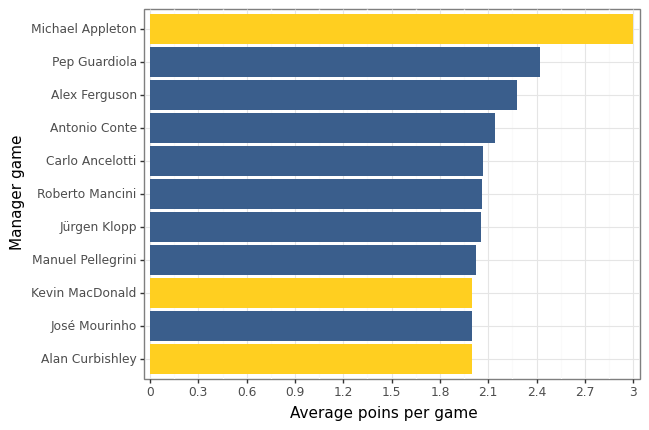

<ggplot: (104796856366)>

In [71]:
top_managers = top_managers.sort_values(by="manager_win_ratio")
ggplot(
    top_managers,
    aes(
        x="reorder(manager_name,manager_win_ratio)",
        y="manager_win_ratio",
        fill=[color[3] if x==1 else color[0] for x in top_managers.fill]),
) + geom_col(show_legend=False) + ylab("Average points per game") + xlab(
    "Manager game"
) + scale_fill_manual(
    values=(color[0], color[3])
) + scale_alpha_manual(
    values=(0.8, 0.3)
) + scale_y_continuous(
    expand=(0.01, 0.01), limis=(0, 3), breaks=seq(0, 3.1, 0.3)
) + coord_flip() + theme_bw()


<p>Great! As we can see, there were three caretakers during the season. Appleton surely is the outlier among them, as he managed a team only once. We can see that Pep Guardiola scores high despite a far larger number of games (114). If we consider the following manager, Alex Ferguson, his average score is even more impressive: 2.27 points for 190 games!</p>
<p>Well, this is it for today. I think I'll only try to plot this same bar chart again using seaborn in the future.</p>
<hr>